### Name of Students: 
1. Tanuja Kaklij   (65)
2. Gauri Bankar    (66)
3. Srushti Hire    (67)
4. Digvijay Wagh   (68)

### Mini Project Title :
Build a machine learning model that predicts the type of people who survived 
the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.).

  Dataset Link: https://www.kaggle.com/competitions/titanic/data
  

<a id="h1"></a>
<center>
<div class="alert alert-block alert-success">
<h1>1_Load Dataset</h1>
</div> 
</center>

### <span style="font-family:Comic Sans MS; color:navy">Importing the libraries</span>
 

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <span style="font-family:Comic Sans MS; color:navy">Train Data</span>

In [2]:
train_df=pd.read_csv('train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <span style="font-family:Comic Sans MS; color:navy">Test Data</span>

In [4]:
test_df=pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


---

<a id="h2"></a>
<center>
<div class="alert alert-block alert-success">
<h1>2_Data Cleaning</h1>
</div> 
</center>

<a id="h2.1"></a>
## <span style="font-family:Comic Sans MS; color:navy">Train Data</span>

In [6]:
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We have 3 features that have some null values in namely Cabin, Age and Embarked.

#### <span style="font-family:Comic Sans MS; color:navy"><b>Cabin Column</b></span>

As we can see the most of the values in the 'Cabin' column are null,<br/>So better to drop it.

In [7]:
train_df.drop('Cabin',axis=1, inplace=True)
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

#### <span style="font-family:Comic Sans MS; color:navy"><b>Age Column</b></span>
Let's fill the missing values in 'Age' column with the help of 'Sex' column 

In [8]:
male_avg_age=train_df[train_df['Sex']=='male']['Age'].mean().round(0)
print("Average age of the male passenger:",male_avg_age)
female_avg_age=train_df[train_df['Sex']=='female']['Age'].mean().round(0)
print("Average age of the female passenger:",female_avg_age)

Average age of the male passenger: 31.0
Average age of the female passenger: 28.0


In [9]:
print("Total null values in 'Age' column :",train_df['Age'].isnull().sum())

Total null values in 'Age' column : 177


In [10]:
#Function to fill the null age values with help of sex of the passenger
def new_age(df):
    age=df[1]
    sex=df[0]
    if pd.isnull(age):
        if sex=='male':
            return 31
        elif sex=='female':
            return 28
    else:
        return age

In [11]:
#Apply the function to fill the null values of age
train_df['Age']=train_df[['Sex','Age']].apply(new_age,axis=1)

#### <span style="font-family:Comic Sans MS; color:navy"><b>Embarked Column</b></span>

In [12]:
print("The total null values in 'Embarked' column :",train_df['Embarked'].isnull().sum())
print("\nThe value count in the column:\n",train_df['Embarked'].value_counts())

The total null values in 'Embarked' column : 2

The value count in the column:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


So lets fill the null values under the 'Embarked' column by the most probable value i.e. 'S'

In [13]:
train_df['Embarked'].fillna('S',inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<span style="font-family:Comic Sans MS; color:navy"><b><em>We have clean the train data</em></b></span>

<a id="h2.2"></a>
## <span style="font-family:Comic Sans MS; color:navy">Test Data</span>
We will repeat almost same steps as followed for cleaning traning data

In [14]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We have 3 features that have some null values in namely Cabin, Age and Fare.

#### <span style="font-family:Comic Sans MS; color:navy"><b>Cabin Column</b></span>
As we can see the most of the values in the 'Cabin' column are null,<br/>So better to drop it.

In [15]:
test_df.drop('Cabin',axis=1, inplace=True)
test_df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

#### <span style="font-family:Comic Sans MS; color:navy"><b>Age Column</b></span>
Let's fill the missing values in 'Age' column with the help of 'Sex' column 

<div class="alert alert-block alert-info">
<b>Note:</b> We are taking TRAIN DATA into consideration so as get more accurate values for filling the null values </div>


In [16]:
# In a Train data
print("Average age of the male passenger:",male_avg_age)
print("Average age of the female passenger:",female_avg_age)

Average age of the male passenger: 31.0
Average age of the female passenger: 28.0


In [17]:
print("Total null values in 'Age' column :",test_df['Age'].isnull().sum())

Total null values in 'Age' column : 86


In [18]:
#Function to fill the null age values with help of sex of the passenger
def new_age(df):
    age=df[1]
    sex=df[0]
    if pd.isnull(age):
        if sex=='male':
            return 31
        elif sex=='female':
            return 28
    else:
        return age

In [19]:
#Apply the function to fill the null values of age
test_df['Age']=test_df[['Sex','Age']].apply(new_age,axis=1)

#### <span style="font-family:Comic Sans MS; color:navy"><b>Fair Column</b></span>

In [20]:
print("Null values in 'Fare' column :", test_df['Fare'].isnull().sum())

Null values in 'Fare' column : 1


In [21]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


Text(0.5, 1.0, 'Pclass vs Fare plot')

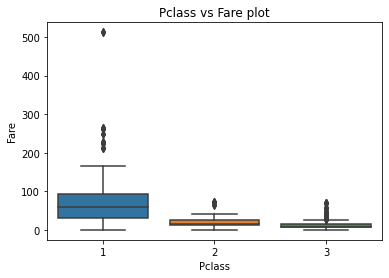

In [22]:
sns.boxplot(x=train_df['Pclass'],y=train_df['Fare'])
plt.title('Pclass vs Fare plot')

In [23]:
Fare_avg=train_df['Fare'].mean().round(4)
Fare_avg

32.2042

This passenger is belongs to Pclass value 3<br/>
As we can see in the above plot of Pclass vs Fare plot, the average fare value for Pclass 3 id lower than 50.<br/> And overall average fare value is 32.2042, so let's fill the missing value directly by the overall average value.

In [24]:
test_df['Fare'].fillna(Fare_avg,inplace=True)

<span style="font-family:Comic Sans MS; color:navy"><b><em>We have clean the test data</em></b></span>

<a id="h3"></a>
<center>
<div class="alert alert-block alert-success">
<h1>3_Exploratory Data Analysis</h1>
</div> 
</center>

### <span style="font-family:Comic Sans MS; color:navy">Importing Visualizations Libraries</span>

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()

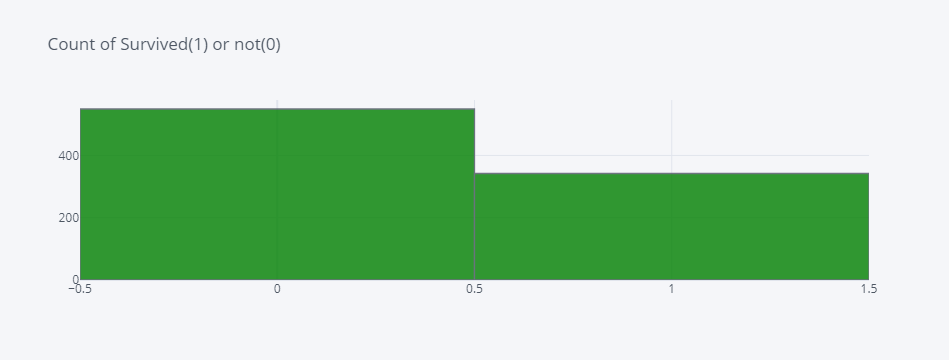

In [52]:
#Survived Count Plot
train_df['Survived'].iplot(kind='hist',title='Count of Survived(1) or not(0)',color='green')

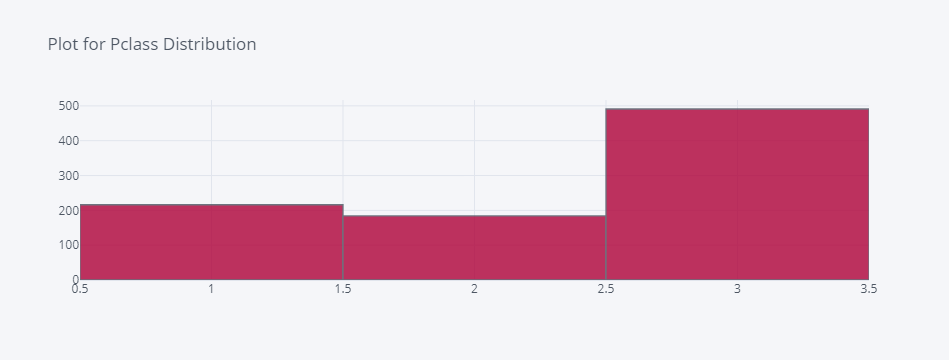

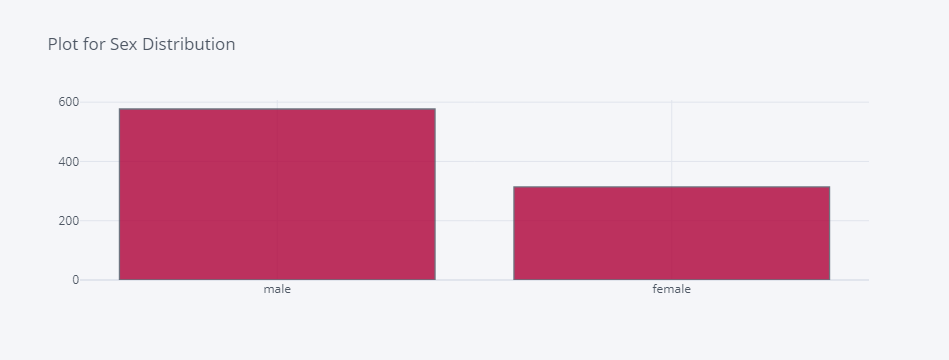

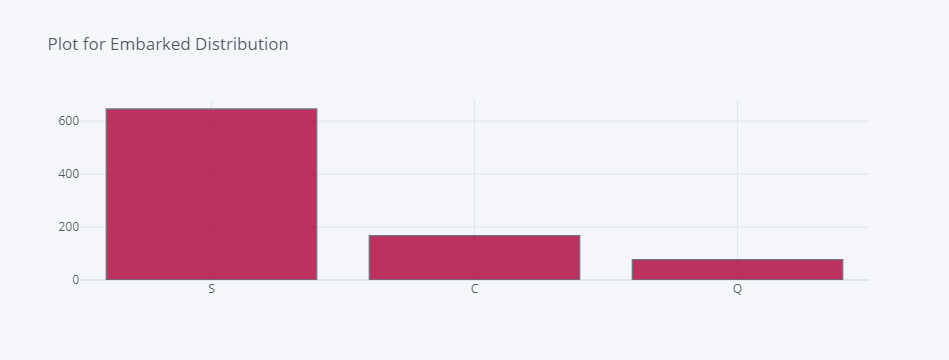

In [27]:
# plots showing distribution of categorical features
for feat in ['Pclass','Sex','Embarked']:
    train_df[feat].iplot(kind ='histogram',bins=3,title='Plot for {} Distribution'.format(feat),color="#AF0038")
    plt.show()

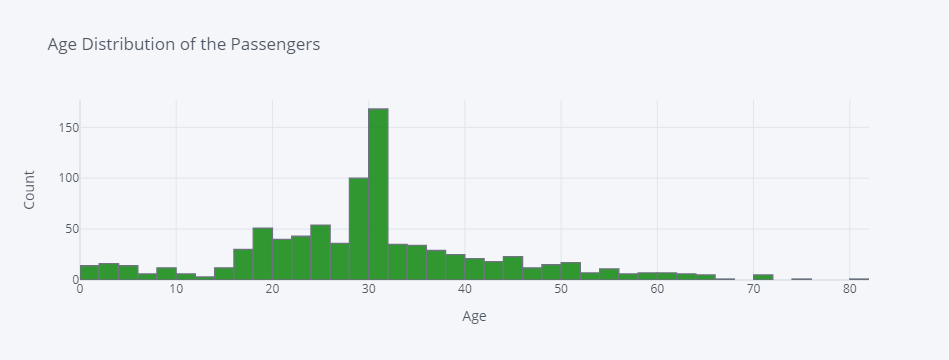

In [51]:
train_df['Age'].iplot(kind='hist',title='Age Distribution of the Passengers',xTitle='Age',yTitle='Count',bins=50,color='green')

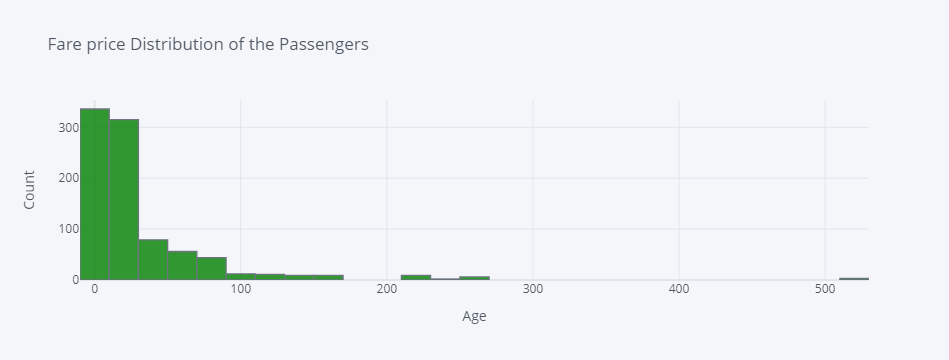

In [29]:
train_df['Fare'].iplot(kind='hist',title='Fare price Distribution of the Passengers',xTitle='Age',yTitle='Count',bins=50,color='green')

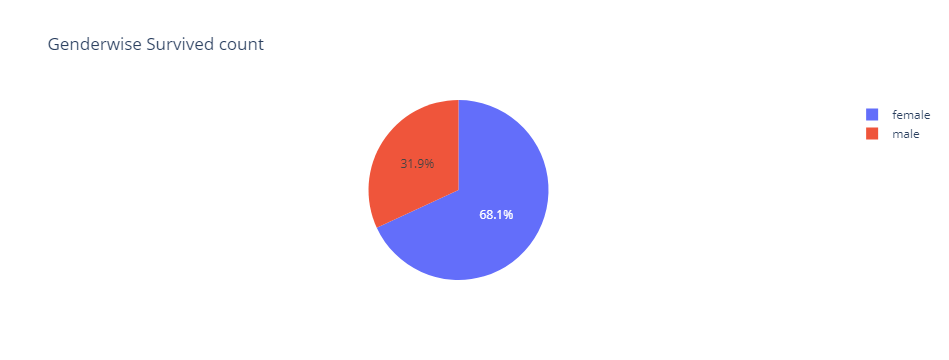

In [30]:
#Survived count according to Gender of passengers
fig = px.pie(train_df, values='Survived', names='Sex',title='Genderwise Survived count')
fig.show()

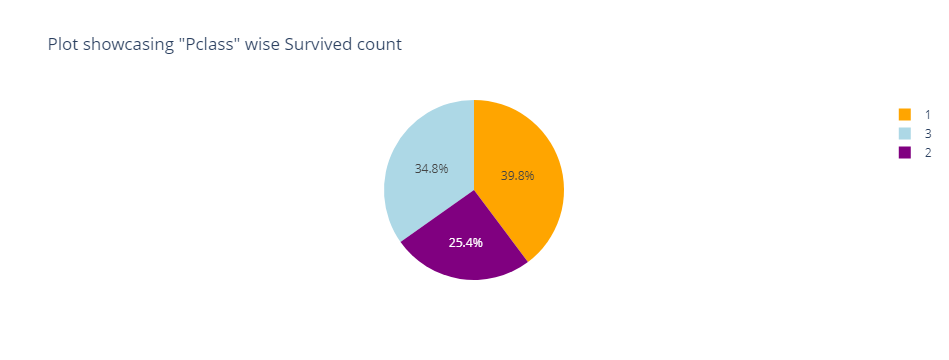

In [31]:
#Survived count according to "Pclass"
fig = px.pie(train_df, values='Survived', names='Pclass',title='Plot showcasing "Pclass" wise Survived count',color_discrete_sequence=["orange", "lightblue", "purple"])
fig.show()

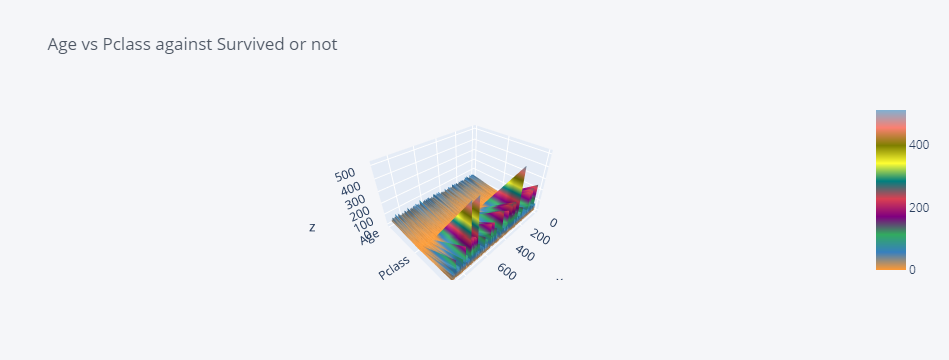

In [32]:
train_df[['Age','Pclass','Fare']].iplot(kind='surface',title='Age vs Pclass against Survived or not')

---

<a id="h4"></a>
<center>
<div class="alert alert-block alert-success">
<h1>4_Predictive Analysis</h1>
</div> 
</center>

We have cleaned the data. Now it is ready for building a machine learning model so as to predict whether the given passenger survived(1) or not(0). **So basically need to build model so as to predict the survived class which will results into binary outcome** <br/>There are several machine learning algorithms are available for the classification. We are going to use 4 of them and will compare their performance(on training data) at the end and accordingly will use one of them to predict test class outcomes

### <span style="font-family:Comic Sans MS; color:navy"><b>Converting categorical data into numerical</b></span>
At first lets get the data ready for the ml algorithm i.e. in numerical form

## <span style="font-family:Comic Sans MS; color:navy">Train Data</span>

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [34]:
train_df=pd.get_dummies(train_df.drop(['Name','Ticket'],axis=1),drop_first=True)
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### <span style="font-family:Comic Sans MS; color:navy">Test Data</span>

In [35]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [36]:
test_df=pd.get_dummies(test_df.drop(['Name','Ticket'],axis=1),drop_first=True)
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


## <span style="font-family:Comic Sans MS; color:navy">Importing the libraries</span> 

In [37]:
from sklearn.model_selection import train_test_split # For spliting the data

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report,confusion_matrix, f1_score # For model evaluation

## <span style="font-family:Comic Sans MS; color:navy">Split the data</span>

Split the train data into into two parts (so as fit the model on one part & evaluate it on the second part of the data)

In [38]:
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<a id="h4.2"></a>
<center>
<div class="alert alert-block alert-success">
<h1>4.1_K Nearest Neighbors (KNN)</h1>
</div> 
</center>

KNN is a classification algorithm which uses feature similarity so as to predict the desired outcome. It considers class of nearest K points to predict the class of point.

In [39]:
# Lets take k=5 at first
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
predictions2 = knn.predict(X_test)

### Model Evaluation

In [40]:
print(confusion_matrix(y_test,predictions2))
print("\n")
print(classification_report(y_test,predictions2))
print("\n")
print("F1 Score :",f1_score(y_test,predictions2))

[[119  35]
 [ 76  38]]


              precision    recall  f1-score   support

           0       0.61      0.77      0.68       154
           1       0.52      0.33      0.41       114

    accuracy                           0.59       268
   macro avg       0.57      0.55      0.54       268
weighted avg       0.57      0.59      0.56       268



F1 Score : 0.4064171122994652


### Choosing the correct k value
for each value of K we can get different values, generally if we increase the value of K performance of model increases to certain value. But we need to find the efficient value of K where we can predict the class of the point. 

In [41]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

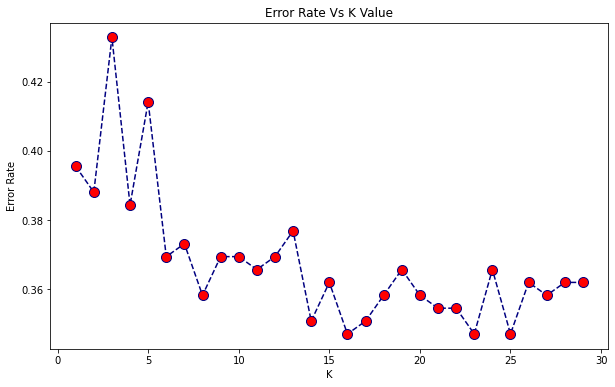

In [42]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error,color='navy', linestyle='dashed', marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the plot above we can see that ***error rate is smallest for k value equals 16***

### Model Evaluation

In [43]:
# for k=19
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
predictions3 = knn.predict(X_test)
print(confusion_matrix(y_test,predictions3))
print('\n')
print(classification_report(y_test,predictions3))
print("\n")
print("F1 Score :",f1_score(y_test,predictions3))

[[145   9]
 [ 84  30]]


              precision    recall  f1-score   support

           0       0.63      0.94      0.76       154
           1       0.77      0.26      0.39       114

    accuracy                           0.65       268
   macro avg       0.70      0.60      0.57       268
weighted avg       0.69      0.65      0.60       268



F1 Score : 0.392156862745098


<a id="h4.2"></a>
<center>
<div class="alert alert-block alert-success">
<h1>4.2_Random Forest Classification</h1>
</div> 
</center>

In [44]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predictions4 = rfc.predict(X_test)

### Model Evaluation

In [45]:
print(confusion_matrix(y_test,predictions4))
print('\n')
print(classification_report(y_test,predictions4))
print("\n")
print("F1 Score :",f1_score(y_test,predictions4))

[[144  10]
 [ 33  81]]


              precision    recall  f1-score   support

           0       0.81      0.94      0.87       154
           1       0.89      0.71      0.79       114

    accuracy                           0.84       268
   macro avg       0.85      0.82      0.83       268
weighted avg       0.85      0.84      0.84       268



F1 Score : 0.7902439024390244


---

<a id="h5"></a>
<center>
<div class="alert alert-block alert-success">
<h1>5_Comparison of Model Performances </h1>
</div> 
</center>

| Model     | F1 Score    |
| ----------- | ----------- |
| KNN    | 0.392    |
| Random Forest    | 0.785    |

As we can see Random Forest Classifier Model has highest F1 score,<br/>
So we will go ahead with Random Forest Algorithm for predicting the test data

---

<a id="h6"></a>
<center>
<div class="alert alert-block alert-success">
<h1>6_Final Predictions</h1>
</div> 
</center>

***Lets predict the data with the help of random forest model that we have trained with the training data***

In [46]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [47]:
predictions5 = rfc.predict(test_df)

In [48]:
df1=pd.DataFrame(test_df['PassengerId'],columns=['PassengerId'])
df2=pd.DataFrame(predictions5,columns=['Prediction_survived'])
df=pd.concat([df1,df2], axis=1)
df

,PassengerId,Prediction_survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [14]:
!jupyter nbconvert --to html titanic-disaster-data1-analysis.ipynb

[NbConvertApp] Converting notebook titanic-disaster-data1-analysis.ipynb to html
[NbConvertApp] Writing 873815 bytes to titanic-disaster-data1-analysis.html
